In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data Understanding and Cleaning

In [2]:
# Reading the csv file and putting it into 'df' object.
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom.shape

(99999, 226)

In [4]:
# Let's understand the type of columns
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Checking for null values
telecom.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [6]:
# code to check null percentage in all coulumns
print(round(100*(telecom.isnull().sum()/len(telecom.index)), 2))
percentage_of_nulls = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
# columns with more than 0 null percentage 
percentage_of_nulls[percentage_of_nulls != 0]
# columns with greater than 10 percent nulls 
percentage_of_nulls[percentage_of_nulls > 10]


mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [7]:
# Checking id column should be unique and we see that it contains unique values
telecom[telecom.duplicated(['mobile_number'], keep = False)]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [8]:
#Settings to view the dataframes properly i.e. to view all the columns but limited number of rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# column names having date in their names
[col for col in telecom.columns if 'date' in col]

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [10]:
# dropping columns that are not important such as 'mobile_number', 'circle_id' and date columns
telecom.drop(['mobile_number', 'circle_id','last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9'],inplace=True,axis=1)


In [11]:
telecom.shape

(99999, 212)

In [12]:
[col for col in telecom.columns if '6' in col]

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [13]:
#creating df with only important columns that needs to be imputed- Imputed columns essential for getting 70th percentile dataframe
telecom_imp_cols=telecom[['total_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6','total_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7']]

telecom[['total_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6','total_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7']]= telecom_imp_cols.fillna(0)

telecom[['total_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6','total_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7']].head()

,total_rech_amt_6,total_rech_data_6,av_rech_amt_data_6,total_rech_amt_7,total_rech_data_7,av_rech_amt_data_7
0,362,1.0,252.0,252,1.0,252.0
1,74,0.0,0.0,384,1.0,154.0
2,168,0.0,0.0,315,0.0,0.0
3,230,0.0,0.0,310,0.0,0.0
4,196,1.0,56.0,350,0.0,0.0


In [14]:
# deriving new metrics for calculating total average recharge made in 6 and 7th month
telecom['total_data_amount_6'] = telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_data_amount_7'] = telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']

In [15]:
# deriving new metrics for calculating total average recharge made in 6 and 7th month
telecom['total_amount_6'] = telecom['total_rech_amt_6']+telecom['total_data_amount_6']
telecom['total_amount_7'] = telecom['total_rech_amt_7']+telecom['total_data_amount_7']

telecom['avg_amount_6_7'] = (telecom['total_amount_6']+telecom['total_amount_7'])/2

In [16]:
# calculating 70th percentile of 'avg_amount_6_7'
perc_70 = telecom['avg_amount_6_7'].quantile(0.70)

In [17]:
# fetching data with greater than equal to 70th percentile of 'avg_amount_6_7'
highval_cust_df = telecom[telecom['avg_amount_6_7']>= perc_70]

In [18]:
highval_cust_df.shape

(30001, 217)

In [19]:
print(round(100*(highval_cust_df.isnull().sum()/len(highval_cust_df.index)), 2))

loc_og_t2o_mou          0.75
std_og_t2o_mou          0.75
loc_ic_t2o_mou          0.75
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
onnet_mou_9             6.34
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
offnet_mou_9            6.34
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_ic_mou_9           6.34
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
roam_og_mou_9           6.34
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2t_mou_9        6.34
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou_7        1.79
loc_og_t2m_mou_8        3.91
loc_og_t2m_mou_9        6.34
loc_og_t2f_mou_6        1.82
loc_og_t2f_mou_7        1.79
loc_og_t2f_mou_8        3.91
loc_og_t2f_mou

In [20]:
highval_cust_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amount_6,total_data_amount_7,total_amount_6,total_amount_7,avg_amount_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0

In [21]:
highval_cust_df.shape

(30001, 217)

In [22]:
# Deriving new column 'churn' with the help of existing columns
highval_cust_df['churn'] = np.where((highval_cust_df['total_ic_mou_9']==0) & (highval_cust_df['total_og_mou_9']==0) & (highval_cust_df['vol_2g_mb_9']==0 ) & (highval_cust_df['vol_3g_mb_9']==0),1,0)

In [23]:
highval_cust_df[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head() 

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
7,1,0.00,0.00,0.00,0.00
8,0,34.91,142.18,0.00,0.00
21,0,252.61,1031.53,0.00,0.00
23,0,127.48,127.63,13.93,314.74


In [24]:
# columns that have '_9' in column name
col_9= [col for col in highval_cust_df.columns if '_9' in col]

In [25]:
# Dropping columns of 9th month - which have'_9' in column name
highval_cust_df = highval_cust_df.drop(col_9, axis =1)

In [26]:
highval_cust_df = highval_cust_df.drop(['total_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6','total_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7','total_data_amount_6','total_data_amount_7','total_amount_6','total_amount_7'], axis =1)

In [27]:
null_columns = round(100*(highval_cust_df.isnull().sum()/len(highval_cust_df.index)), 2)
null_columns[null_columns>10]

total_rech_data_8     46.83
max_rech_data_6       44.15
max_rech_data_7       43.15
max_rech_data_8       46.83
count_rech_2g_6       44.15
count_rech_2g_7       43.15
count_rech_2g_8       46.83
count_rech_3g_6       44.15
count_rech_3g_7       43.15
count_rech_3g_8       46.83
av_rech_amt_data_8    46.83
arpu_3g_6             44.15
arpu_3g_7             43.15
arpu_3g_8             46.83
arpu_2g_6             44.15
arpu_2g_7             43.15
arpu_2g_8             46.83
night_pck_user_6      44.15
night_pck_user_7      43.15
night_pck_user_8      46.83
fb_user_6             44.15
fb_user_7             43.15
fb_user_8             46.83
dtype: float64

In [28]:
# Dropping columns having high null values
highval_cust_df.drop(highval_cust_df.columns[null_columns>10],axis=1,inplace=True)

In [29]:
print(round(100*(highval_cust_df.isnull().sum()/len(highval_cust_df.index)), 2))

loc_og_t2o_mou        0.75
std_og_t2o_mou        0.75
loc_ic_t2o_mou        0.75
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           1.82
onnet_mou_7           1.79
onnet_mou_8           3.91
offnet_mou_6          1.82
offnet_mou_7          1.79
offnet_mou_8          3.91
roam_ic_mou_6         1.82
roam_ic_mou_7         1.79
roam_ic_mou_8         3.91
roam_og_mou_6         1.82
roam_og_mou_7         1.79
roam_og_mou_8         3.91
loc_og_t2t_mou_6      1.82
loc_og_t2t_mou_7      1.79
loc_og_t2t_mou_8      3.91
loc_og_t2m_mou_6      1.82
loc_og_t2m_mou_7      1.79
loc_og_t2m_mou_8      3.91
loc_og_t2f_mou_6      1.82
loc_og_t2f_mou_7      1.79
loc_og_t2f_mou_8      3.91
loc_og_t2c_mou_6      1.82
loc_og_t2c_mou_7      1.79
loc_og_t2c_mou_8      3.91
loc_og_mou_6          1.82
loc_og_mou_7          1.79
loc_og_mou_8          3.91
std_og_t2t_mou_6      1.82
std_og_t2t_mou_7      1.79
std_og_t2t_mou_8      3.91
std_og_t2m_mou_6      1.82
s

In [30]:
# imputing all null values in the highval_cust_df dataframe with 0
highval_cust_df.fillna(0, inplace=True)

In [31]:
#Remove Columns with only 1 unique value
highval_cust_df = highval_cust_df.loc[:,highval_cust_df.apply(pd.Series.nunique) != 1]
highval_cust_df.shape

(30001, 125)

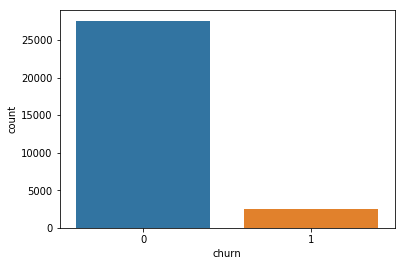

In [32]:
# Count plot to analyse values of churn and non churn
sns.countplot(x='churn', data= highval_cust_df)

In [33]:
# To plot a bar graph of churn and non churn vs mean of 'avg_amount_6_7', creating a new df mean_amount
mean_amount=pd.DataFrame({'churn':['churn','nonchurn'],'mean_amount':[(highval_cust_df[highval_cust_df['churn']==1]['avg_amount_6_7'].mean()),(highval_cust_df[highval_cust_df['churn']==0]['avg_amount_6_7'].mean())]})

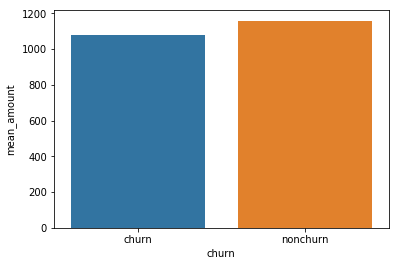

In [34]:
# To plot a bar graph of churn and non churn vs mean of 'avg_amount_6_7'
sns.barplot(x="churn", y="mean_amount", data=mean_amount)

## Data Preparation and Model Building

In [35]:
X = highval_cust_df.drop(['churn'], axis=1)
y = highval_cust_df['churn']

X_copy= X.copy()
cols = X_copy.columns

highval_cust_PCA= highval_cust_df.drop(['churn'], axis=1)


In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [37]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


## Performing PCA

In [38]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [39]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [40]:
colnames = list(highval_cust_PCA.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.160967,0.045861,arpu_6
1,0.172869,0.063235,arpu_7
2,0.175897,0.047972,arpu_8
3,0.100598,0.136826,onnet_mou_6
4,0.111434,0.156115,onnet_mou_7
5,0.117593,0.143934,onnet_mou_8
6,0.152100,0.092303,offnet_mou_6
7,0.161757,0.115507,offnet_mou_7
8,0.161856,0.098923,offnet_mou_8
9,0.019462,0.009989,roam_ic_mou_6


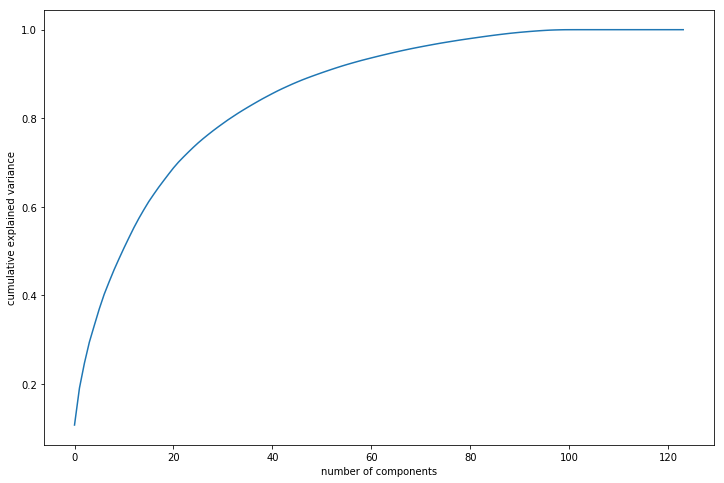

In [41]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 50 components are enough to describe appr 90% of the variance in the dataset

In [42]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [43]:
train_pca = pca_final.fit_transform(X_train)
train_pca.shape

(21000, 50)

In [44]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(train_pca.transpose())

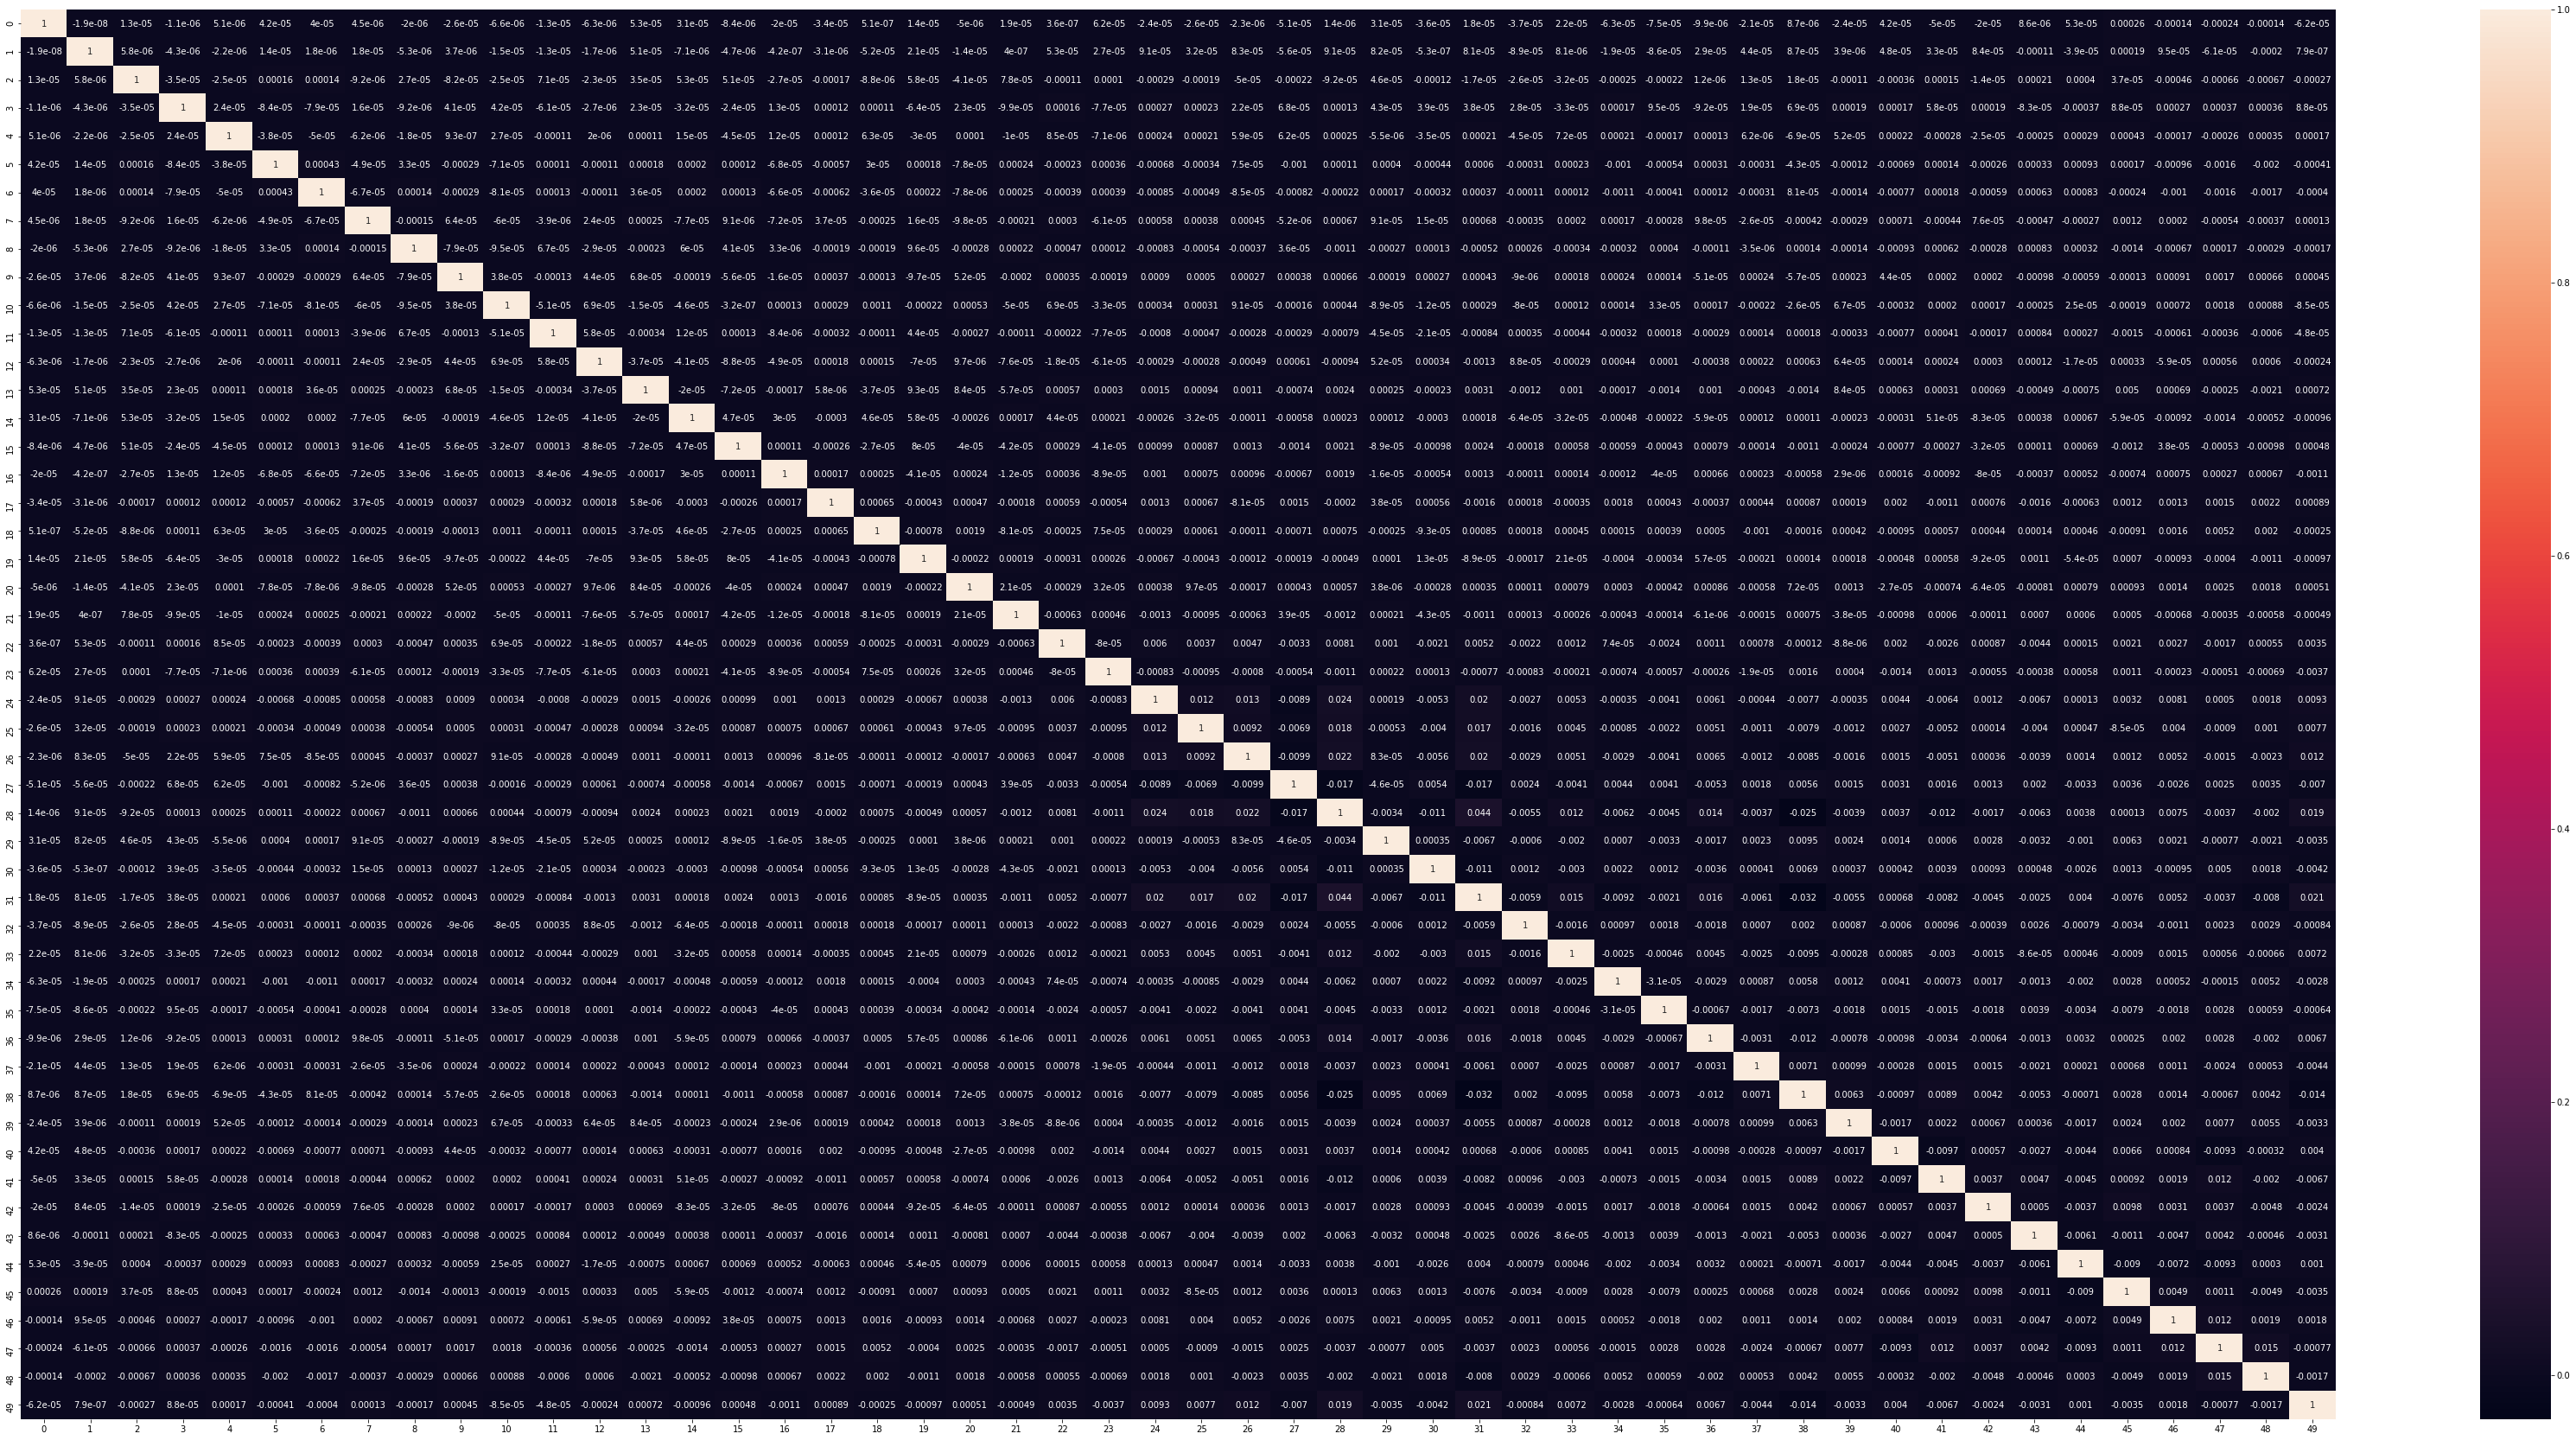

In [45]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (60,30))
sns.heatmap(corrmat,annot = True)

In [46]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.04446791122551427 , min corr:  -0.032129498803703714


Indeed - there is no correlation between any two components! Good job, PCA!

In [47]:
#Applying selected components to the test data - 50 components
test_pca = pca_final.transform(X_test)
test_pca.shape

(9001, 50)

## Logistic regression after PCA for prediction of churn 

In [48]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score

log_pca = LogisticRegression(class_weight='balanced')
model_pca = log_pca.fit(train_pca,y_train)

In [49]:
# predicting on test_pca
y_pred = log_pca.predict(test_pca)

In [60]:
# confusion matrix to calculate sensitivity, accuracy metrics
cm = confusion_matrix(y_test,y_pred)
sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
specificity= cm[0,0]/(cm[0,1]+cm[0,0])
precision= cm[1,1]/(cm[0,1]+cm[1,1])
accuracy= (cm[0,0]+cm[1,1])/(sum(sum(cm)))
print(sensitivity)
print(specificity)
print(precision)
print(accuracy)

0.84
0.8160223003272331
0.29329608938547486
0.8180202199755583


## Sensitivity got from the above model is 84% hence changing probability cutoff to increase the sensitivity of the model.

In [51]:
#Making prediction on the test data
y_pred_prob = model_pca.predict_proba(test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob))

'0.89'

We see an overall AUC score of 0.89 looks like we did a decent job

In [52]:
# creating dataframe with actual churn rate and predicted churn probability
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob_df],axis=1)


# renaming column
y_pred_final= y_pred_final.rename(columns={ 0 :'Churn_Prob'})
y_pred_final.head(20)


,churn,ID,Churn_Prob
0,1,20296,0.664304
1,1,8279,0.392817
2,0,72269,0.169044
3,0,65602,0.345780
4,1,42758,0.891109
5,0,80210,0.108306
6,0,67925,0.232357
7,0,25034,0.115109
8,0,10422,0.051131
9,0,43140,0.418547


In [53]:

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,ID,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,20296,0.664304,1,1,1,1,1,1,1,0,0,0
1,1,8279,0.392817,1,1,1,1,0,0,0,0,0,0
2,0,72269,0.169044,1,1,0,0,0,0,0,0,0,0
3,0,65602,0.345780,1,1,1,1,0,0,0,0,0,0
4,1,42758,0.891109,1,1,1,1,1,1,1,1,1,0


In [54]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi','preci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi,preci]
print(cutoff_df)

     prob  accuracy     speci     sensi     preci
0.0   0.0  0.083324  0.000000  1.000000  0.083324
0.1   0.1  0.388623  0.336080  0.966667  0.116879
0.2   0.2  0.545273  0.508908  0.945333  0.148918
0.3   0.3  0.660260  0.637135  0.914667  0.186413
0.4   0.4  0.749917  0.739183  0.868000  0.232251
0.5   0.5  0.818020  0.816022  0.840000  0.293296
0.6   0.6  0.872348  0.880499  0.782667  0.373172
0.7   0.7  0.905899  0.923282  0.714667  0.458512
0.8   0.8  0.920231  0.954430  0.544000  0.520408
0.9   0.9  0.923453  0.983275  0.265333  0.590504


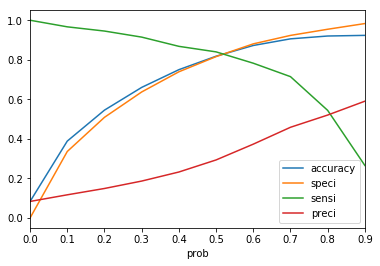

In [55]:

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi','preci'])

In [131]:
# Chaging the probability cutoff to 0.34 to check wheter we can increase the sensitivity of the model.
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.34 else 0)

In [132]:
# Confusion matrix after changing probability- Finally got 89% of sensitivity with good accuracy
cf1 = confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)
sensitivity_1= cf1[1,1]/(cf1[1,0]+cf1[1,1])
specificity_1= cf1[0,0]/(cf1[0,1]+cf1[0,0])
precision_1= cf1[1,1]/(cf1[0,1]+cf1[1,1])
totalcf1=sum(sum(cf1))
accuracy_1 = (cf1[0,0]+cf1[1,1])/totalcf1
print(cf1 )
print(sensitivity_1)
print(specificity_1)
print(precision_1)
print(accuracy_1)

[[5640 2611]
 [  75  675]]
0.9
0.6835535086656163
0.2054169202678028
0.7015887123652927


## Finally got 90% of sensitivity with good accuracy with logistic regression model

In [58]:
# Final df with churn prediction
y_pred_final.head()

,churn,ID,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,20296,0.664304,1,1,1,1,1,1,1,0,0,0,1
1,1,8279,0.392817,1,1,1,1,0,0,0,0,0,0,1
2,0,72269,0.169044,1,1,0,0,0,0,0,0,0,0,0
3,0,65602,0.345780,1,1,1,1,0,0,0,0,0,0,0
4,1,42758,0.891109,1,1,1,1,1,1,1,1,1,0,1


## Hence the above dataframe (y_pred_final) is the final output with final churn prediction.

# Identify important variables using random forest

In [109]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=42, class_weight={0:0.1, 1: 0.9})

In [110]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [111]:
# Making predictions
predictions = rfc.predict(X_test)

In [112]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [113]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.77      0.38      0.51       750

   micro avg       0.94      0.94      0.94      9001
   macro avg       0.86      0.69      0.74      9001
weighted avg       0.93      0.94      0.93      9001



In [116]:
# Printing confusion matrix
RF_cm= confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[8164   87]
 [ 462  288]]


In [115]:
print(accuracy_score(y_test,predictions))

0.939006777024775


In [117]:
sensitivity_RF= RF_cm[1,1]/(RF_cm[1,0]+RF_cm[1,1])
specificity_RF= RF_cm[0,0]/(RF_cm[0,1]+RF_cm[0,0])
precision_RF= RF_cm[1,1]/(RF_cm[0,1]+RF_cm[1,1])
totalRF_cm=sum(sum(RF_cm))
accuracy_RF = (RF_cm[0,0]+RF_cm[1,1])/totalRF_cm
print(sensitivity_RF)
print(specificity_RF)
print(precision_RF)
print(accuracy_RF)

0.384
0.989455823536541
0.768
0.939006777024775


## Lets tune the hyper parameters and see

### Tuning max depth

In [118]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state=42, class_weight={0:0.1, 1: 0.9})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [119]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.467167,0.022515,0.029892,0.009565,2,{'max_depth': 2},0.885731,0.894429,0.891413,0.890524,0.003606,4,0.895993,0.893857,0.882151,0.890667,0.006084
1,1.337452,0.166881,0.046722,0.010727,7,{'max_depth': 7},0.926725,0.926143,0.928133,0.927000,0.000835,3,0.944853,0.943214,0.939219,0.942429,0.002366
2,1.835520,0.182365,0.030210,0.012336,12,{'max_depth': 12},0.939580,0.940714,0.941849,0.940714,0.000926,2,0.978713,0.974643,0.973788,0.975714,0.002149
3,1.852991,0.077025,0.029737,0.004542,17,{'max_depth': 17},0.939152,0.943429,0.946421,0.943000,0.002983,1,0.983999,0.981500,0.982001,0.982500,0.001079


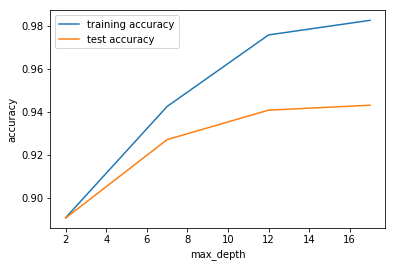

In [120]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()


### Tuning n_estimators

In [121]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state=42, class_weight={0:0.1, 1: 0.9},max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.179398,0.149276,0.151122,0.006031,100,{'n_estimators': 100},0.929439,0.930286,0.928704,0.929476,0.000646,4,0.945782,0.947286,0.942218,0.945095,0.002125
1,38.966700,1.006578,0.694126,0.005429,500,{'n_estimators': 500},0.930867,0.929286,0.929133,0.929762,0.000784,3,0.945639,0.946571,0.942433,0.944881,0.001773
2,72.285697,1.454678,1.297208,0.050207,900,{'n_estimators': 900},0.930724,0.929857,0.929276,0.929952,0.000595,2,0.945710,0.946929,0.942290,0.944976,0.001964
3,109.098266,4.152724,1.985969,0.146032,1300,{'n_estimators': 1300},0.930724,0.930286,0.929133,0.930048,0.000671,1,0.945853,0.946857,0.942504,0.945072,0.001861


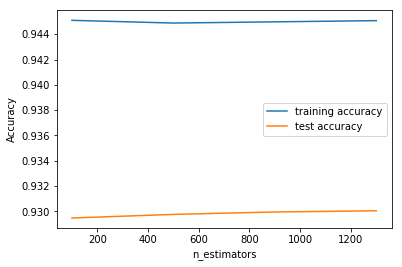

In [134]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [135]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(random_state=42, class_weight={0:0.1, 1: 0.9},max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.518371,0.033179,0.036517,0.007458,4,{'max_features': 4},0.907156,0.901857,0.901272,0.903429,0.002647,5,0.914994,0.905500,0.899864,0.906786,0.006243
1,0.794628,0.008771,0.045577,0.011506,8,{'max_features': 8},0.913012,0.917286,0.914702,0.915000,0.001757,1,0.921780,0.922286,0.911363,0.918476,0.005034
2,1.284464,0.036290,0.028721,0.001379,14,{'max_features': 14},0.908299,0.906714,0.910987,0.908667,0.001764,2,0.916923,0.912786,0.909578,0.913095,0.003006
3,1.595466,0.059134,0.033733,0.015261,20,{'max_features': 20},0.909870,0.902143,0.906129,0.906048,0.003155,4,0.916637,0.905643,0.907007,0.909762,0.004893
4,1.546557,0.094061,0.021625,0.004712,24,{'max_features': 24},0.912013,0.915286,0.894413,0.907238,0.009165,3,0.924280,0.920071,0.901936,0.915429,0.009695


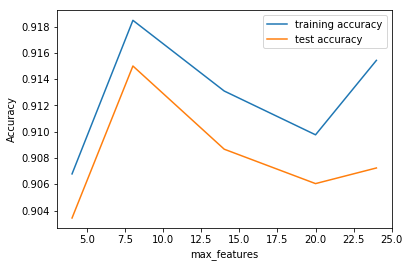

In [137]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [138]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(random_state=42, class_weight={0:0.1, 1: 0.9},max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [139]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.616568,0.069614,0.020455,0.006298,100,{'min_samples_leaf': 100},0.905871,0.909143,0.905987,0.907000,0.001516,1,0.914708,0.910000,0.901293,0.908667,0.005557
1,0.730379,0.046302,0.025598,0.004846,150,{'min_samples_leaf': 150},0.899443,0.907000,0.899843,0.902095,0.003472,3,0.911994,0.910857,0.898579,0.907143,0.006074
2,0.639481,0.079913,0.020926,0.000722,200,{'min_samples_leaf': 200},0.902585,0.905571,0.902843,0.903667,0.001351,2,0.912779,0.909929,0.898150,0.906953,0.006332
3,0.699309,0.013473,0.030799,0.004932,250,{'min_samples_leaf': 250},0.894444,0.894714,0.896700,0.895286,0.001006,4,0.903850,0.896929,0.889579,0.896786,0.005827
4,0.757509,0.022397,0.026834,0.000730,300,{'min_samples_leaf': 300},0.885302,0.896571,0.890699,0.890857,0.004602,5,0.894707,0.898714,0.883580,0.892334,0.006402


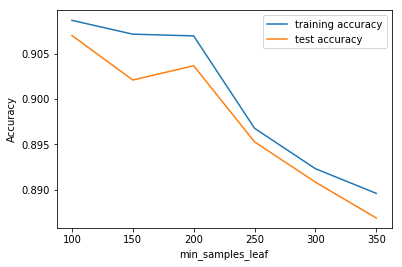

In [140]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [142]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(random_state=42, class_weight={0:0.1, 1: 0.9},max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [143]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.955938,0.092913,0.043257,0.004582,200,{'min_samples_split': 200},0.907299,0.914714,0.910273,0.910762,0.003047,2,0.914637,0.917286,0.904578,0.912167,0.005474
1,0.855298,0.082650,0.040270,0.009584,250,{'min_samples_split': 250},0.908870,0.913714,0.912559,0.911714,0.002066,1,0.918851,0.917571,0.904293,0.913572,0.006582
2,0.888460,0.135046,0.037249,0.004511,300,{'min_samples_split': 300},0.905871,0.912000,0.910273,0.909381,0.002581,4,0.917780,0.916571,0.903150,0.912500,0.006630
3,0.786012,0.006330,0.034496,0.000702,350,{'min_samples_split': 350},0.906013,0.912571,0.906129,0.908238,0.003064,6,0.916494,0.917286,0.901364,0.911715,0.007326
4,0.629777,0.047340,0.026686,0.006696,400,{'min_samples_split': 400},0.907442,0.913429,0.910273,0.910381,0.002445,3,0.919066,0.916357,0.902936,0.912786,0.007053


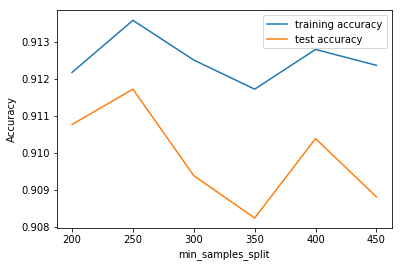

In [144]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [145]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=42, class_weight={0:0.1, 1: 0.9})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [146]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [147]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9144761904761904 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [148]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300,random_state=42, class_weight={0:0.1, 1: 0.9})

In [149]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=4, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

In [150]:
# predict
predictions = rfc.predict(X_test)

In [151]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [152]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8251
           1       0.51      0.69      0.59       750

   micro avg       0.92      0.92      0.92      9001
   macro avg       0.74      0.81      0.77      9001
weighted avg       0.93      0.92      0.92      9001



In [153]:
print(confusion_matrix(y_test,predictions))

[[7753  498]
 [ 233  517]]


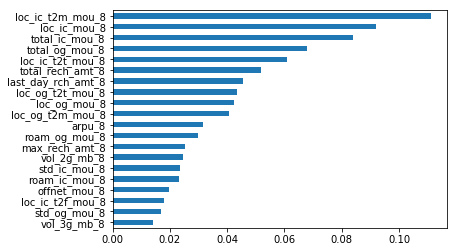

In [155]:
X = highval_cust_PCA
# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-20:].plot(kind = 'barh')

### From random forest algorithm, Local Incoming for Month 8 for Operator T to other operator mobile, Local Incoming for Month 8, total incoming for month 8 , total outgoing for month 8, total recharge amount for month 8, last day recharge for month 8, local outgoing for month 8 are the most important predictor variables to predict churn.

## Strategies to manage customer churn:

### 1. Very Less Amount of High Value customers are churning hence it is a good news to the operator.
### 2. Std Outgoing Calls and Revenue Per Customer are good indicators of Churn.
### 3. Mobile internet usage volume(Vol) and offnet calls is not a strong indicator of Churn.
### 4. Local Incoming and Outgoing Calls, last day of recharge, recharge amount are the strong Churn Indicator.
